In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns

from pandas.core.frame import DataFrame
from glassnode import *
from tqdm import tqdm
from utilities import ohlc_plot

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

plt.rcParams['figure.figsize'] = [15, 7]
sns.set()

In [2]:
GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'

self = GlassnodeClient()
self.set_api_key(GLASSNODE_API_KEY)


Metrics = {'Indicators':Indicators,
           'Market':Market,
           'Mining':Mining,
           'Supply':Supply,
           'Addresses':Addresses,
           'Transactions':Transactions,
           'Blockchain':Blockchain,
           'Derivatives':Derivatives,
           'Distribution':Distribution,
           'Entities':Entities,
           'Institutions':Institutions}


DataDict = {}
series = {}
dataframes = {}
catalog = {}

for group in Metrics:
    DataDict[group] = {}
    series[group] = []
    dataframes[group] = []
    catalog[group] = []

In [3]:
for group in tqdm(['Market']):
    
    metric = Metrics[group]

    for m in metric:
        df = pd.DataFrame()
        
        url = URLS[group] + m
        a ='BTC'
        c = 'native'
        i='24h'

        df = self.get(url,a,i,c)
        
        if isinstance(df,pd.DataFrame):
            dataframes[group].append(m)
        else:
            series[group].append(m)
            
        DataDict[group][m] = df
        
        try:
            start_date = df.index[0].strftime('%Y-%m-%d')
            end_date = df.index[-1].strftime('%Y-%m-%d')
            
            if isinstance(df,pd.DataFrame):
                N_NaNs = df.iloc[:,0].isna().sum()
            else:
                N_NaNs = df.isna().sum()
                
        except:
            start_date,end_date,N_NaNs
            
        catalog[group].append({'Name':m,'start_date':start_date,'end_date':end_date,'N_NaNs':N_NaNs})
        
    catalog[group] = pd.DataFrame(catalog[group])


100%|█████████████████████████████████████████████| 1/1 [00:13<00:00, 13.39s/it]


In [4]:
Price = DataDict['Market']['price_usd_ohlc']
deltacap = DataDict['Market']['deltacap_usd']

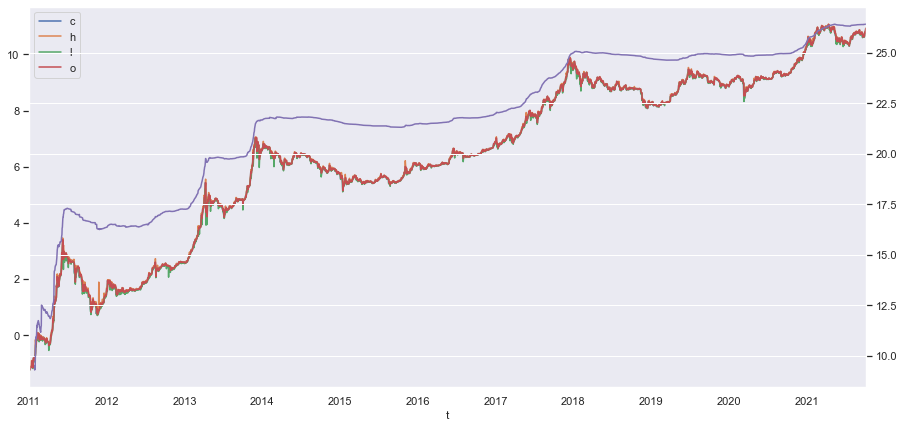

In [48]:
np.log(Price.loc['2011':]).plot()
np.log(deltacap.loc['2011':]).plot(secondary_y = True)

r_px = 100*np.log(Price.loc['2011':]).diff()
r_del = 100*np.log(deltacap.loc['2011':]).diff()

<AxesSubplot:xlabel='t'>

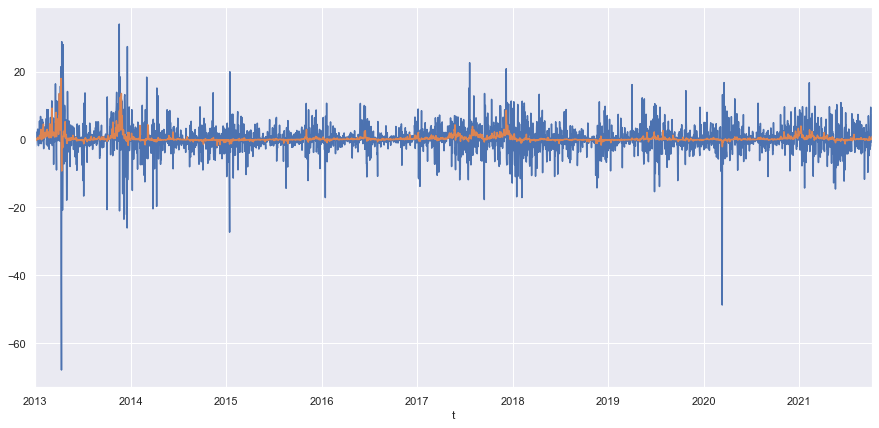

In [49]:
r_px['c'].loc['2013':].plot()
r_del.loc['2013':].plot()

In [50]:
pd.concat([r_px['c'],r_del.loc['2013':]],1).dropna().corr()

,c,market_deltacap_usd
c,1.000000,0.271674
market_deltacap_usd,0.271674,1.000000


In [35]:
from statsmodels.tsa.stattools import coint

print(deltacap.loc['2011':].shape)
print(Price.loc['2011':,'c'].shape)

df = pd.concat([Price.loc['2011':,'c'],deltacap.loc['2011':]],axis = 1).dropna()

(3932,)
(3933,)


In [40]:
coint(df.iloc[:,0],df.iloc[:,1],maxlag = 10,trend = 'ct')

(-4.858282557222651,
 0.0015079775428561088,
 array([-4.33154973, -3.78299017, -3.49811194]))

In [41]:
import statsmodels.api as sm

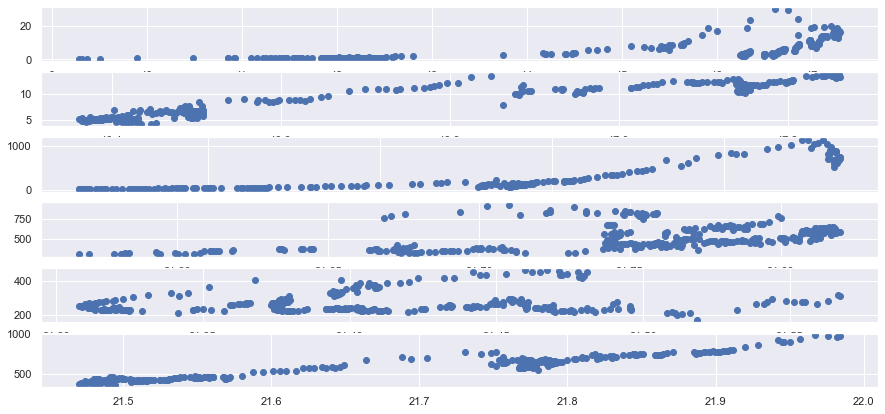

In [55]:
f,a = plt.subplots(nrows = 6)
a[0].scatter(np.log(df.loc['2011','market_deltacap_usd']),df.loc['2011','c'])
a[1].scatter(np.log(df.loc['2012','market_deltacap_usd']),df.loc['2012','c'])
a[2].scatter(np.log(df.loc['2013','market_deltacap_usd']),df.loc['2013','c'])
a[3].scatter(np.log(df.loc['2014','market_deltacap_usd']),df.loc['2014','c'])
a[4].scatter(np.log(df.loc['2015','market_deltacap_usd']),df.loc['2015','c'])
a[5].scatter(np.log(df.loc['2016','market_deltacap_usd']),df.loc['2016','c'])

In [64]:
y = df['c'].loc[:'2016']
X = sm.add_constant(df['market_deltacap_usd']).loc[:'2016']

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:28:32   Log-Likelihood:                -13307.
No. Observations:                2192   AIC:                         2.662e+04
Df Residuals:                    2190   BIC:                         2.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.3223      3.307      1.307      0.191      -2.163      10.807
market_deltacap_usd  1.933e-07   1.83e-09    105.622      0.000     1.9e-07    1.97e-07
==============================================================================
Omnibus:                      890.438   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6969.263
Skew:                           1.717   Prob(JB):                         0.00
Kurtosis:                      11.032   Cond. No.                     2.67e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

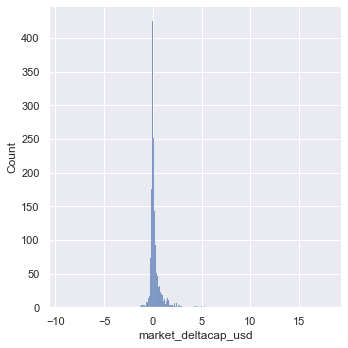

In [66]:
df1 = 

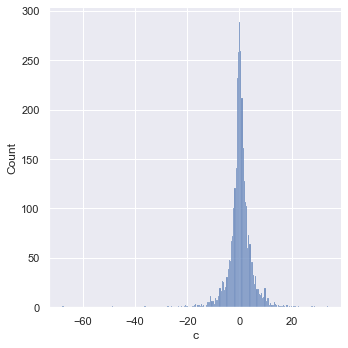

In [68]:
sns.displot(r_px.loc['2013':,'c'])

In [70]:
df = pd.concat([r_px['c'].loc['2013':'2016'],r_del.loc['2013':'2016']],1)
y = df['c'].loc[:'2016']
X = sm.add_constant(df['market_deltacap_usd']).loc[:'2016']

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           8.32e-30
Time:                        13:47:30   Log-Likelihood:                -4348.7
No. Observations:                1461   AIC:                             8701.
Df Residuals:                    1459   BIC:                             8712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0450      0.128     -0.353      0.724      -0.295       0.205
market_deltacap_usd     1.0430      0.090     11.597      0.000       0.867       1.219
==============================================================================
Omnibus:                      893.696   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65617.322
Skew:                          -2.039   Prob(JB):                         0.00
Kurtosis:                      35.577   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""